# PyIRI Tutorial: Global Daily Ionospheric Parameters and Electron Density

This tutorial demonstrates how to use the **PyIRI** model (with its spherical harmonics architecture) to compute and visualize global maps of ionospheric parameters for a specified month, year, day, and solar activity F10.7 index.

Specifically, this example shows how to:

- Configure the PyIRI model for a given date
- Specify the **foF2** and **hmF2** models (e.g., CCIR or URSI for foF2; SHU2015, AMTB2013, or BSE1979 for hmF2)
- Generate a **horizontal global grid** in **geographic coordinates (GEO)**
- Evaluate ionospheric parameters at each grid point over a full 24-hour UT cycle

> **Note**: This example uses **GEO** input coordinates (longitude, latitude).
> The PyIRI model also supports input in:
> - **Magnetic Local Time & Quasi-Dipole Latitude (MLT)**
> - **Quasi-Dipole Longitude & Latitude (QD)**  
> See the coordinate transformation tutorial for how to generate and use these input formats.

---

### Output

The output consists of gridded global maps of key ionospheric parameters. For example, the `F2` dictionary includes:

- **foF2** – Peak plasma frequency of the F2 layer  
- **hmF2** – Peak height of the F2 layer  
- **B0** and **B1** – Thickness and shape parameters defining the electron density profile  

All output maps have the shape **(N_T, N_G)**, where:
- `N_T` is the number of time points (from the UT array)
- `N_G` is the number of horizontal grid locations

The EDP output has the shape **(N_T, N_V, N_G)**, where:
- `N_V` is the number of vertical points (from the altitude array)

In [1]:
# Import libraries
import numpy as np
import PyIRI
import PyIRI.sh_library as sh  # Updated PyIRI using spherical harmonics
import matplotlib.pyplot as plt

# Specify date
year = 2020
month = 4
day = 1

# Specify solar activity index (F10.7 in SFU)
F107 = 100

# Create horizontal grid
lon_res = 5
lat_res = 5
alon_2d, alat_2d = np.mgrid[-180:180 + lon_res:lon_res, -90:90 + lat_res:lat_res]
alon = np.reshape(alon_2d, alon_2d.size)
alat = np.reshape(alat_2d, alat_2d.size)

# Time grid: Universal Time from 0 to 24 in 15-minute steps
hr_res = 1
aUT = np.arange(0, 24, hr_res)

# Height grid: 90 km to 700 km in 1 km steps
alt_res = 1
alt_min = 90
alt_max = 700
aalt = np.arange(alt_min, alt_max, alt_res)

# Coefficient sources and model options
foF2_coeff = 'CCIR'       # Options: 'CCIR' or 'URSI'
hmF2_model = 'SHU2015'    # Options: 'SHU2015', 'AMTB2013', 'BSE1979'
coord = 'GEO'             # Coordinate system: 'GEO', 'QD', or 'MLT'
coeff_dir = None          # Use default coefficient path

# ----------------------------------------
# Run PyIRI (Spherical Harmonics version)
# ----------------------------------------
# Compute ionospheric parameters for F2, F1, and E layers
F2, F1, E, sun, mag, EDP = sh.IRI_density_1day(year,
                                               month,
                                               day,
                                               aUT,
                                               alon,
                                               alat,
                                               aalt,
                                               F107,
                                               coeff_dir=coeff_dir,
                                               foF2_coeff=foF2_coeff,
                                               hmF2_model=hmF2_model,
                                               coord=coord)

### Plot results for parameters

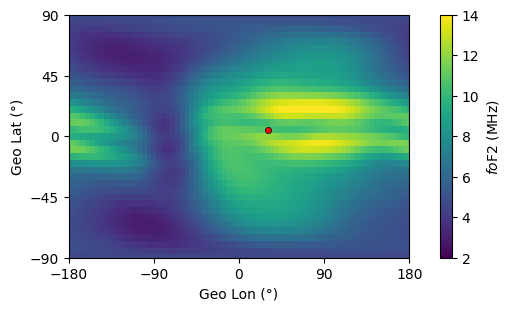

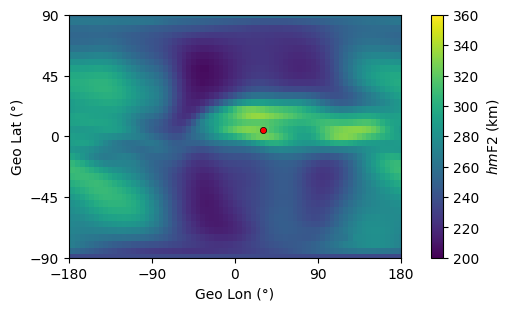

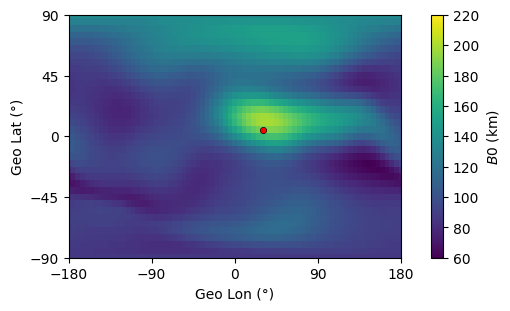

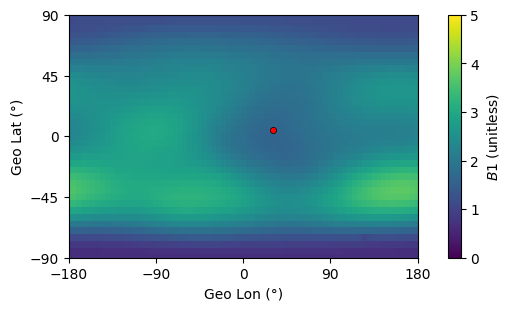

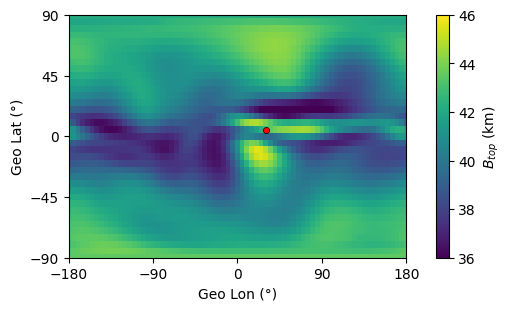

In [2]:
# Select a time frame to plot
UT_plot = 10

ind_time = np.where(aUT == UT_plot)

# Plot foF2
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F2['fo'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=2, vmax=14)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$fo$F2 (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foF2.png', format='png', bbox_inches='tight')


# Plot hmF2
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F2['hm'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=200, vmax=360)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$hm$F2 (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_hmF2.png', format='png', bbox_inches='tight')


# Plot B0
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F2['B0'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=60, vmax=220)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$B0$ (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B0.png', format='png', bbox_inches='tight')


# Plot B1
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F2['B1'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=5)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$B1$ (unitless)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B1.png', format='png', bbox_inches='tight')


# Plot B_top
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F2['B_top'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=36, vmax=46)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$B_{top}$ (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B_top.png', format='png', bbox_inches='tight')


### Plot results for F1 layer

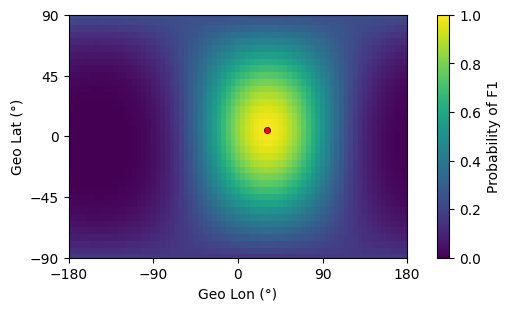

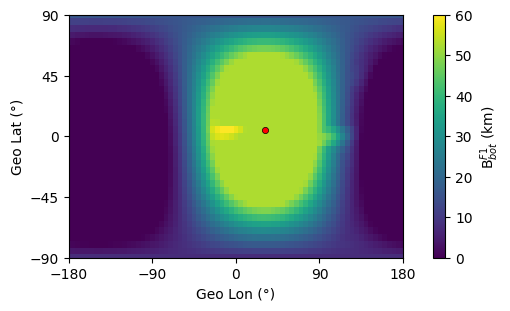

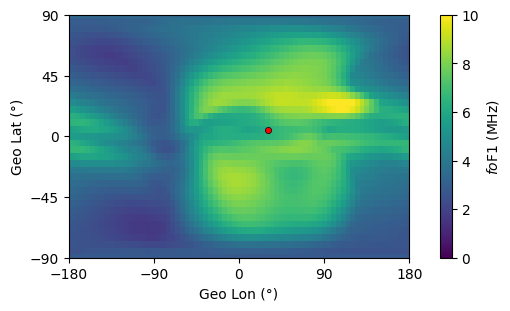

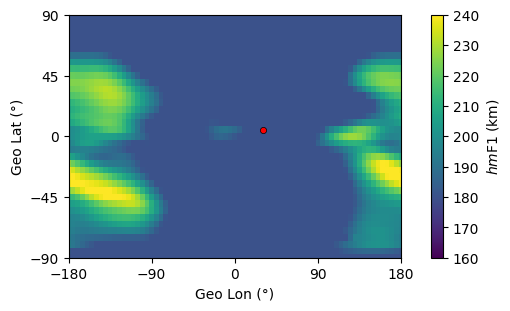

In [17]:
# Plot probability of F1 to occurre
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F1['P'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=1)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Probability of F1')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_P.png', format='png', bbox_inches='tight')


# Plot thickness of F1
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F1['B_bot'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=60)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('B$_{bot}^{F1}$ (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B_F1_bot.png', format='png', bbox_inches='tight')


# Plot foF1
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F1['fo'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=10)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$fo$F1 (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foF1.png', format='png', bbox_inches='tight')


# Plot hmF1
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(F1['hm'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=160, vmax=240)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$hm$F1 (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_hmF1.png', format='png', bbox_inches='tight')

### Plot results for E region

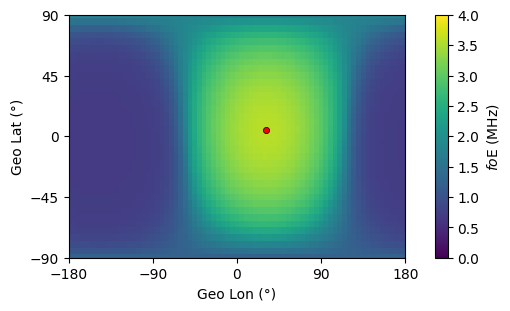

In [18]:
# Plot foE
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(E['fo'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=4)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$fo$E (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foE.png', format='png', bbox_inches='tight')


### Calculate vertical TEC from EDP array

In [19]:
TEC = PyIRI.main_library.edp_to_vtec(EDP, aalt, min_alt=0.0, max_alt=202000.0)

### Plot vTEC

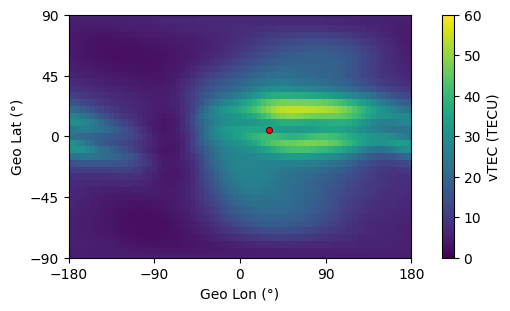

In [20]:
# Plot vTEC
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(TEC[ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=60)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('vTEC (TECU)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_vTEC.png', format='png', bbox_inches='tight')

### Plot electron density vertical profiles from one location

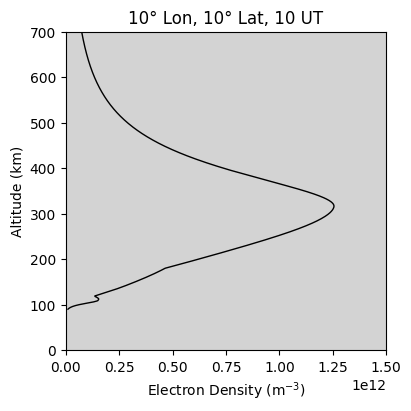

In [23]:
# Select location to plot EDP
lon_plot = 10
lat_plot = 10


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(4, 4),
                           constrained_layout=True)
ax.set_xlabel('Electron Density (m$^{-3}$)')
ax.set_ylabel('Altitude (km)')
ax.set_facecolor("lightgrey")
plt.xlim([0, 1.5e12])
plt.ylim([0, 700])
ind_grid = np.where((alon == lon_plot) & (alat == lat_plot))
ind_time = np.where(aUT == UT_plot)
ind_vert = np.where(aalt >= 0)
ind = ind_time, ind_vert, ind_grid
x = np.reshape(EDP[ind], aalt.shape)
ax.plot(x, aalt, c='black', linewidth=1)
plt.title(str(lon_plot) + '° Lon, ' + str(lat_plot) + '° Lat, ' + str(UT_plot) + ' UT')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_EDP.png', format='png', bbox_inches='tight')

### Compute the sporadic E layer critical frequency

Because the sporadic E layer contains sharper density gradients, a higher number of spherical harmonic coefficients is needed to reconstruct it accurately. The sporadic E layer parameter functions are therefore decoupled from the ionospheric parameter computation of the F2, F1, and E layers.

In [8]:
# Compute ionospheric parameters for sporadic E layer
Es = sh.sporadic_E_1day(year,
                        month,
                        day,
                        aUT,
                        alon,
                        alat,
                        F107,
                        coeff_dir=coeff_dir,
                        coord=coord)

### Plot foEs

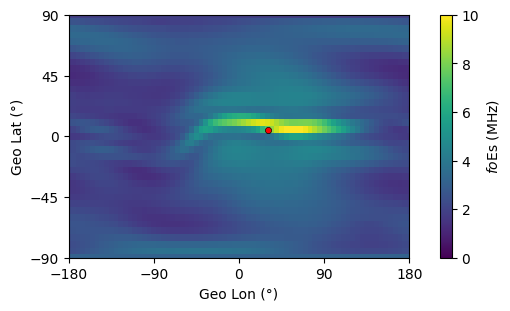

In [9]:
# Plot foEs
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
ax.set_facecolor('grey')
ax.set_xlabel('Geo Lon (°)')
ax.set_ylabel('Geo Lat (°)')
z = np.reshape(Es['fo'][ind_time, :], alon_2d.shape)
mesh = ax.pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=10)
ax.scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                    c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('$fo$Es (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foEs.png', format='png', bbox_inches='tight')